# Assignment 01

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
import scienceplots
plt.style.use(['science'])
plt.rcParams.update({'font.size': 20, 'font.weight': 'bold', 'axes.labelweight': 'bold', 'font.family': 'sans-serif', 'legend.fontsize': 12})

In [40]:
# u1 rate of mutation from 0 to 1
# u2 rate of mutation from 1 to 0
u1 = 0.003
u2 = 0.001

# Number of generations
T = 2000

# Population size
N = [50,1000,10000]

In [3]:
# Generation of initial population
# Probability of A/B 
prob = 0.5


In [4]:
@njit

def mut_no_selection(T,N,pop_0,u1,u2):
    """
    Mutation without selection
    ---------
    Parameters:
    T: int
        number of generations
    N: int
        population size
    pop_0: array(Nx1)
        initial population size
    u1: float
        rate of change from one species to another
    u2: float
        rate of change from one species to another

    """
    population = np.zeros((T,N))
    frequencies = np.zeros((T,2))
    frequencies[0,0] = np.sum(pop_0)/N
    frequencies[0,1] = 1 - frequencies[0,0]
    population[0,:] = pop_0
    for t in range(1,T):
        for i in range(N):
            if population[t-1,i] == 0:
                if np.random.rand() < u1:
                    population[t,i] = 1
                else:
                    population[t,i] = 0
            else:
                if np.random.rand() < u2:
                    population[t,i] = 0
                else:
                    population[t,i] = 1
        frequencies[t,0] = np.sum(population[t,:])/N
        frequencies[t,1] = 1 - frequencies[t,0]
    return population, frequencies
    

In [31]:
%%time
pop_0 = np.zeros(N[0])


#ensuring half is A/B 
numA = int(prob*N[0])
indices = np.random.choice(N[0],numA, replace=False)
for i in indices:
    pop_0[i] =1
pops, freq = mut_no_selection(T,N[0],pop_0,u1,u2)

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.65 ms


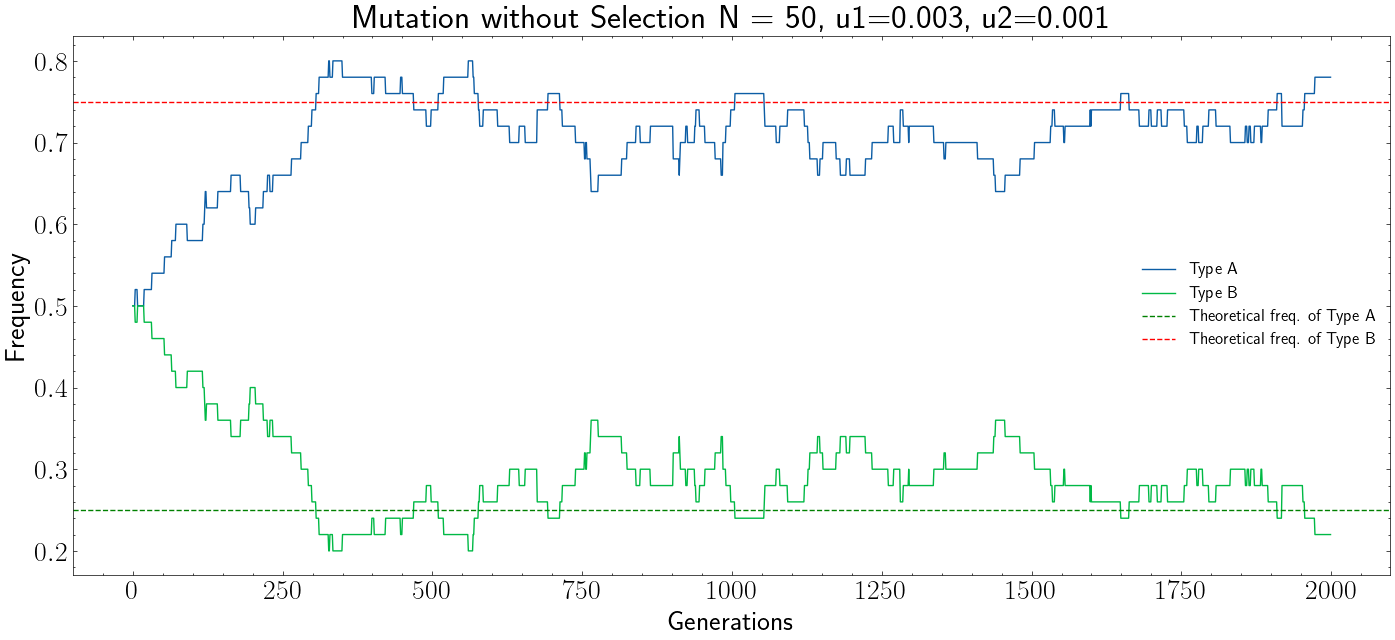

In [33]:
fig, axes = plt.subplots(figsize=(17,7))
axes.plot(np.arange(T), freq[:,0], label="Type A")
axes.plot(np.arange(T), freq[:,1], label="Type B")
axes.axhline(y=u2/(u1+u2), color='g', linestyle='--', label="Theoretical freq. of Type A")
axes.axhline(y=u1/(u1+u2), color='r', linestyle='--', label="Theoretical freq. of Type B")
axes.set_xlabel("Generations")
axes.set_ylabel("Frequency")
axes.set_title(f"Mutation without Selection N = {N[0]}, u1={u1}, u2={u2}")
axes.legend()
fig.savefig(f"images/ass01/mutation_no_selection_N{N[0]}.png", dpi=300)



In [43]:
%%time
pop_0 = np.zeros(N[1])


#ensuring half is A/B 
numA = int(prob*N[1])
indices = np.random.choice(N[1],numA, replace=False)
for i in indices:
    pop_0[i] =1
pops, freq = mut_no_selection(T,N[1],pop_0,u1,u2)


CPU times: user 33.5 ms, sys: 940 μs, total: 34.5 ms
Wall time: 34.5 ms


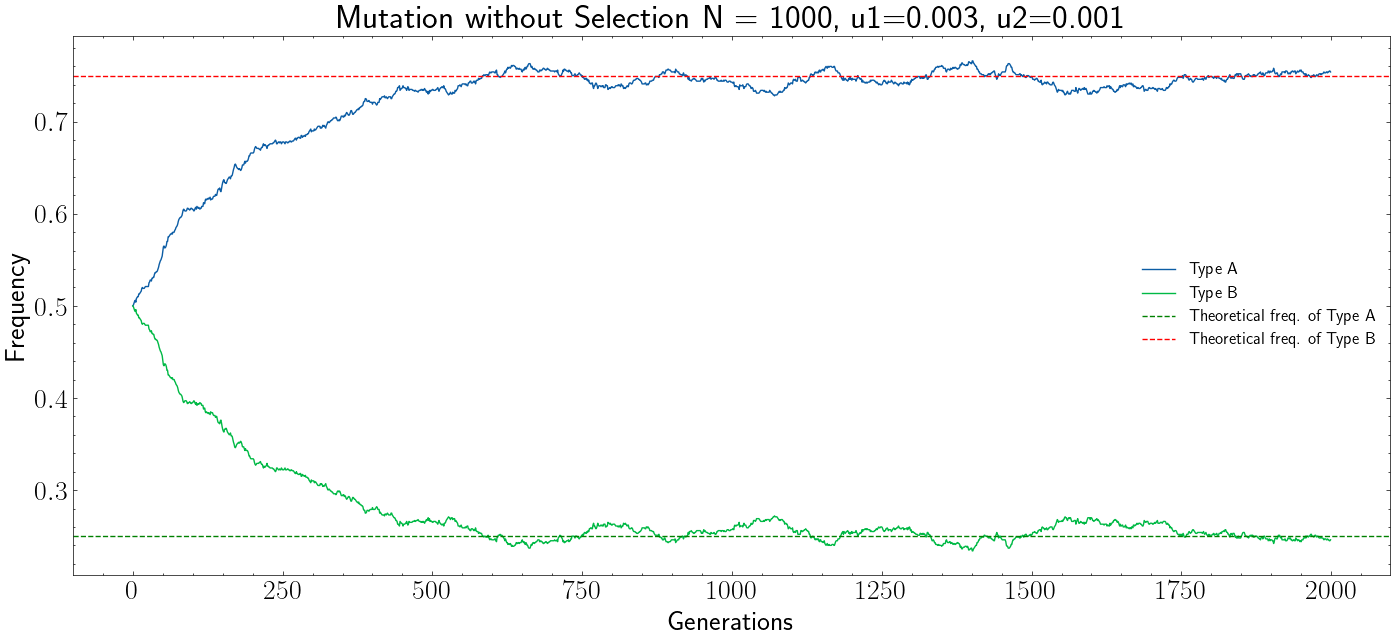

In [44]:
fig, axes = plt.subplots(figsize=(17,7))
axes.plot(np.arange(T), freq[:,0], label="Type A")
axes.plot(np.arange(T), freq[:,1], label="Type B")
axes.axhline(y=u2/(u1+u2), color='g', linestyle='--', label="Theoretical freq. of Type A")
axes.axhline(y=u1/(u1+u2), color='r', linestyle='--', label="Theoretical freq. of Type B")
axes.set_xlabel("Generations")
axes.set_ylabel("Frequency")
axes.set_title(f"Mutation without Selection N = {N[1]}, u1={u1}, u2={u2}")
axes.legend()

fig.savefig(f"images/ass01/mutation_no_selection_N{N[1]}.png", dpi=300)



In [11]:
%%time
pop_0 = np.zeros(N[2])


#ensuring half is A/B 
numA = int(prob*N[2])
indices = np.random.choice(N[2],numA, replace=False)
for i in indices:
    pop_0[i] =1
pops, freq = mut_no_selection(T,N[2],pop_0,u1,u2)


CPU times: user 428 ms, sys: 5.96 ms, total: 434 ms
Wall time: 435 ms


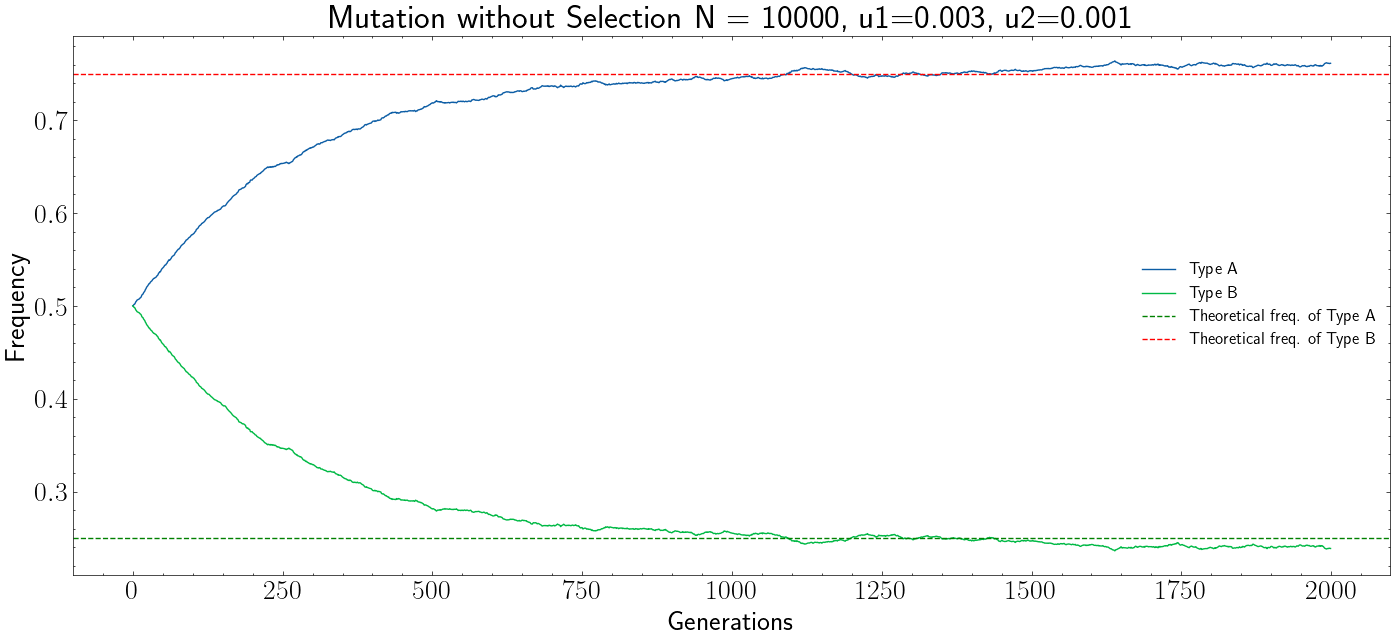

In [12]:
fig, axes = plt.subplots(figsize=(17,7))
axes.plot(np.arange(T), freq[:,0], label="Type A")
axes.plot(np.arange(T), freq[:,1], label="Type B")
axes.axhline(y=u2/(u1+u2), color='g', linestyle='--', label="Theoretical freq. of Type A")
axes.axhline(y=u1/(u1+u2), color='r', linestyle='--', label="Theoretical freq. of Type B")
axes.set_xlabel("Generations")
axes.set_ylabel("Frequency")
axes.set_title(f"Mutation without Selection N = {N[2]}, u1={u1}, u2={u2}")
axes.legend()

# fig.savefig(f"images/ass01/mutation_no_selection_N{N[2]}.png", dpi=300)

In [34]:
pop_0 = np.zeros(int(1e5))


#ensuring half is A/B 
numA = int(prob*int(1e5))
indices = np.random.choice(int(1e5),numA, replace=False)
for i in indices:
    pop_0[i] =1
pops, freq = mut_no_selection(T,int(1e5),pop_0,u1,u2)

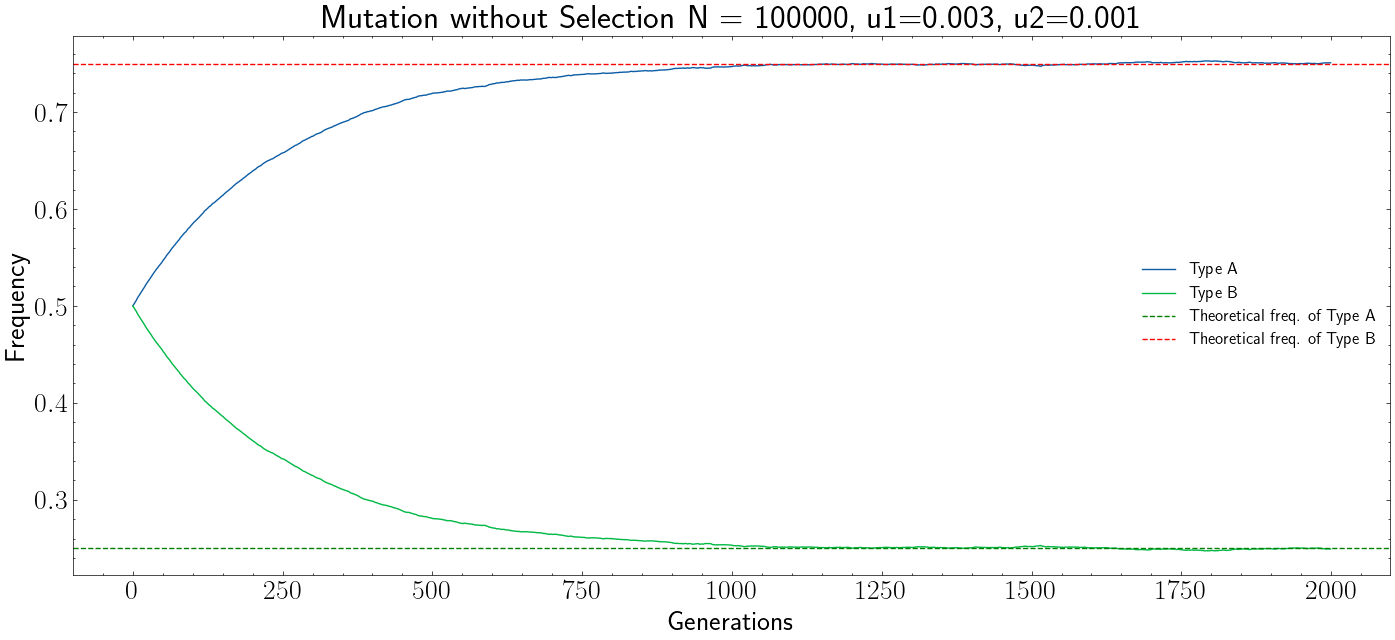

In [35]:
fig, axes = plt.subplots(figsize=(17,7))
axes.plot(np.arange(T), freq[:,0], label="Type A")
axes.plot(np.arange(T), freq[:,1], label="Type B")
axes.axhline(y=u2/(u1+u2), color='g', linestyle='--', label="Theoretical freq. of Type A")
axes.axhline(y=u1/(u1+u2), color='r', linestyle='--', label="Theoretical freq. of Type B")
axes.set_xlabel("Generations")
axes.set_ylabel("Frequency")
axes.set_title(f"Mutation without Selection N = {int(1e5)}, u1={u1}, u2={u2}")
axes.legend()

fig.savefig(f"images/ass01/mutation_no_selection_N{int(1e5)}.png", dpi=300) 

In [46]:
pop_0 = np.zeros(1000)
u1 = 0.07
u2 = 0.001

#ensuring half is A/B 
numA = int(prob*1000)
indices = np.random.choice(1000,numA, replace=False)
for i in indices:
    pop_0[i] =1
pops, freq = mut_no_selection(T,1000,pop_0,u1,u2)

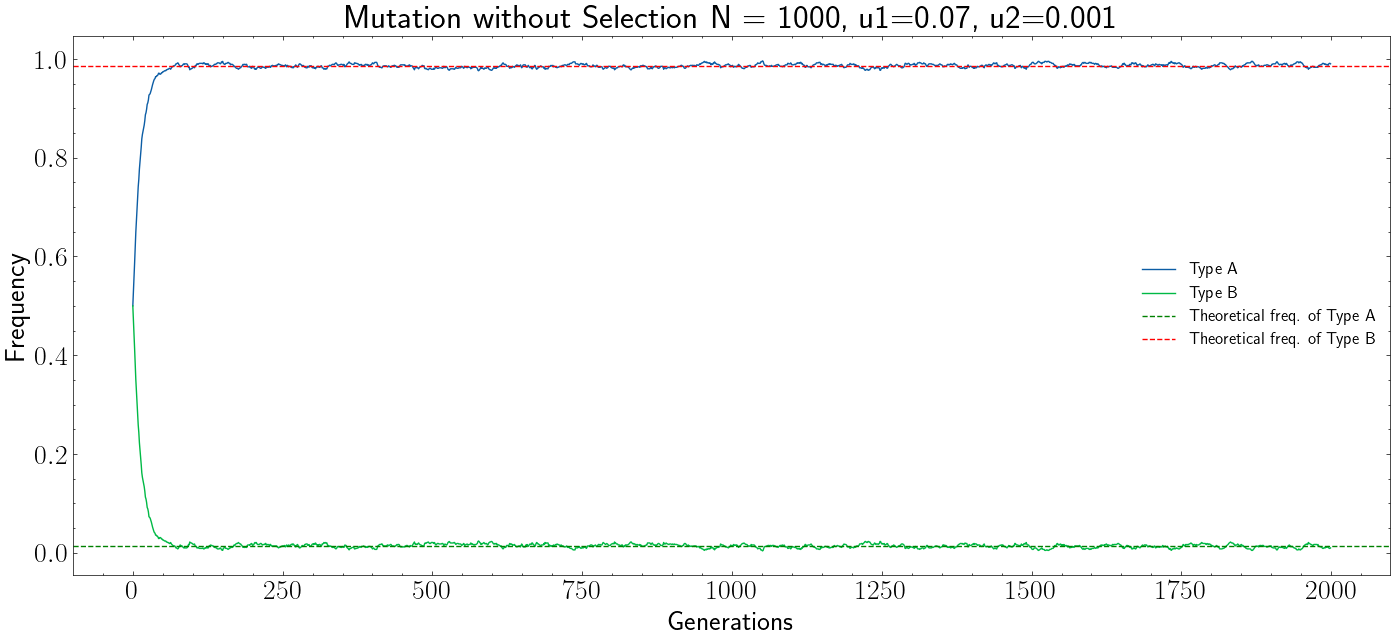

In [47]:
fig, axes = plt.subplots(figsize=(17,7))
axes.plot(np.arange(T), freq[:,0], label="Type A")
axes.plot(np.arange(T), freq[:,1], label="Type B")
axes.axhline(y=u2/(u1+u2), color='g', linestyle='--', label="Theoretical freq. of Type A")
axes.axhline(y=u1/(u1+u2), color='r', linestyle='--', label="Theoretical freq. of Type B")
axes.set_xlabel("Generations")
axes.set_ylabel("Frequency")
axes.set_title(f"Mutation without Selection N = {1000}, u1={u1}, u2={u2}")
axes.legend()

fig.savefig(f"images/ass01/mutation_no_selection_N{1000}_diffu_u.png", dpi=300)